# Исследование продаж игр интернет-магазина

##  Описание проекта и исходные данные
**Цель :  на основе предоставленных данных провести исследовательский анализ данных и получить ответы на перечень поставленных задач:**

*1 этап. Подготовить данные для исследования:*
- Заменить названия столбцов (приведите к нижнему регистру);
- Преобразовать данные в нужные типы;
- Обработать пропуски и при необходимости:
  1. Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
  2. Описсать причины, которые могли привести к пропускам;
  3. Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать его обработку.
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

*2 этап. Исследовательский анализ данных*
- Изучить, сколько игр выпускалось в разные годы. Сделать вывод о важности всех периодов.
- Изучить, как менялись продажи по платформам. Выбрать латформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Изучить данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Исследовать какие платформы лидируют по продажам, растут или падают? Выбрать потенциально прибыльные платформы.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Изучить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Выводы.
- Соотнести выводы с продажами игр на других платформах.
- Изучить общее распределение игр по жанрам. Сделать вывод о самых прибыльных жанрах? Выделить жанры с высокими и низкими продажами.
*3 этап. Составление портрета пользователя каждого региона*
Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опистаь различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияение рейтинга ESRB на продажи в отдельном регионе.

*Общий вывод*



## Описание данных

 - ```Name``` — название игры
 - ```Platform```— платформа
 - ```Year_of_Release``` — год выпуска
 - ```Genre``` — жанр
 - ```NA_sales``` — продажи в Северной Америке (миллионы проданных копий)
 - ```EU_sales``` — продажи в Европе (миллионы проданных копий)
 - ```JP_sales``` — продажи в Японии (миллионы проданных копий)
 - ```Other_sales``` — продажи в других странах (миллионы проданных копий)
 - ```Critic_Score``` — оценка критиков (максимум 100)
 - ```User_Score``` — оценка пользователей (максимум 10)
 - ```Rating``` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).


In [1]:
!pip install jupyter-black

In [2]:
# помощник писать код красиво
import jupyter_black

jupyter_black.load()

# необходимые библиотеки
import pandas as pd
from textwrap import dedent
from IPython import get_ipython
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from matplotlib.colors import (
    LinearSegmentedColormap,
)  # поможет расскарсить датафрейм

# Скроем лишние предупреждения
warnings.filterwarnings("ignore")

# Настройки Pandas для вывода всех столбцов
pd.set_option("display.max_columns", None)


In [3]:
# улучшение четкости изображения графиков
%config InlineBackend.figure_format = 'retina'

In [4]:
try:
    data = pd.read_csv("datasets/games.csv", sep=",")
except:
    data = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv", sep=",")

display(data.head(6))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# обработаем копию датасета чтобы работать с ней, а не с оригинальной таблицей
df = data.copy()
# Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
# удалим явные дубликаты  строк
df = df.drop_duplicates()
# привычный формат отображения чисел
pd.options.display.float_format = "{:,.2f}".format
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


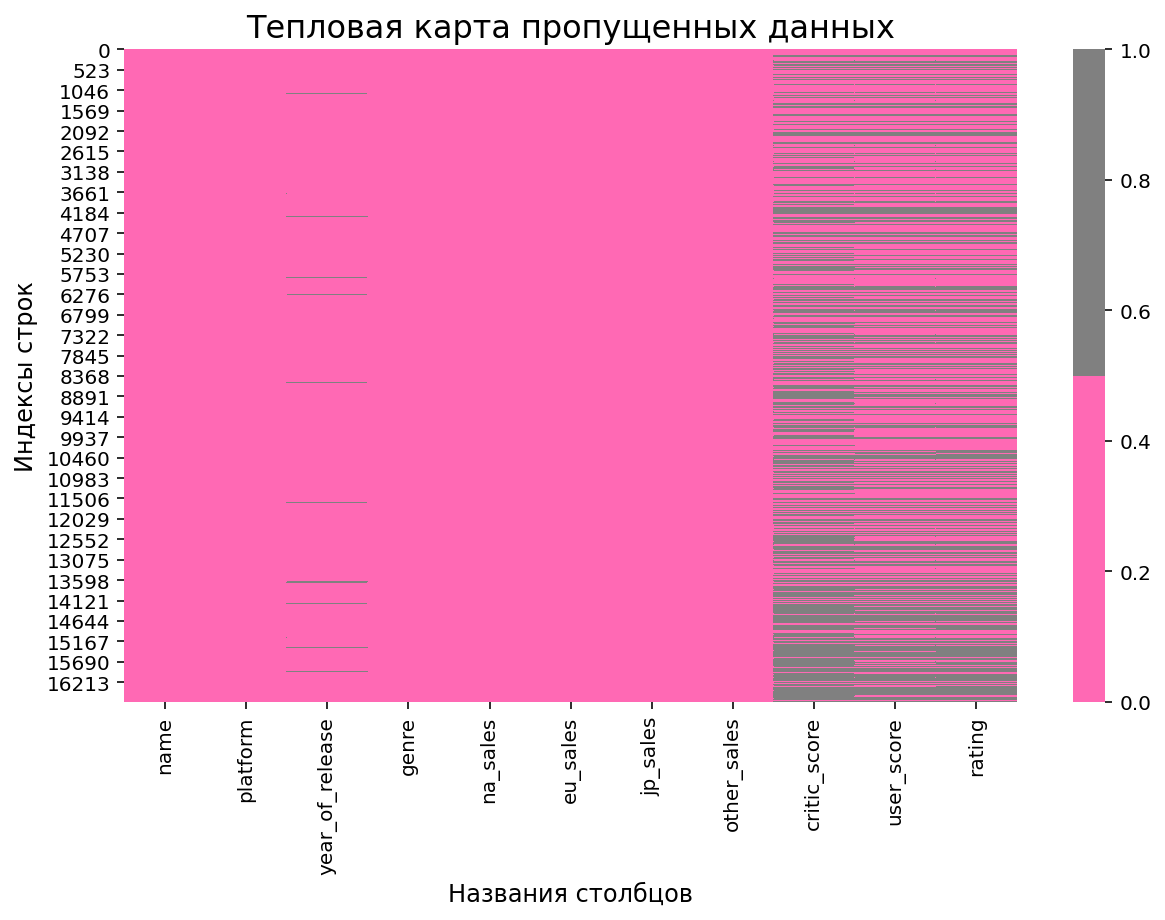

In [6]:
cols = df.columns
# определяем цвета
# Розовый - пропущенные данные, серый - не пропущенные
colours = ["#ff69b4", "#808080"]
# Настройка размера графика
plt.figure(figsize=(10, 6))
# Создание тепловой карты пропущенных данных
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours), cbar=True)
# Добавление заголовка и меток осей
plt.title("Тепловая карта пропущенных данных", fontsize=16)
plt.xlabel("Названия столбцов", fontsize=12)
plt.ylabel("Индексы строк", fontsize=12)
plt.show()